Epoch 1/30


/home/daddy/miniconda3/envs/ml_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-02 21:49:13.083406: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7586 - loss: 0.5928 - val_accuracy: 0.6429 - val_loss: 0.7251
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7586 - loss: 0.5293 - val_accuracy: 0.6429 - val_loss: 0.6631
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7586 - loss: 0.5039 - val_accuracy: 0.6429 - val_loss: 0.6328
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7586 - loss: 0.4869 - val_accuracy: 0.6429 - val_loss: 0.6192
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7586 - loss: 0.4693 - val_accuracy: 0.6429 - val_loss: 0.6048
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7586 - loss: 0.4561 - val_accuracy: 0.6429 - val_loss: 0.5883
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7586 - loss: 0.4422 - val_accuracy: 0.6429 - val_loss: 0.5823
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7586 - loss: 0.4315 - val_accuracy: 0.6429 - val_loss: 0.5741
Epoch 9/30
9/9 ━━━

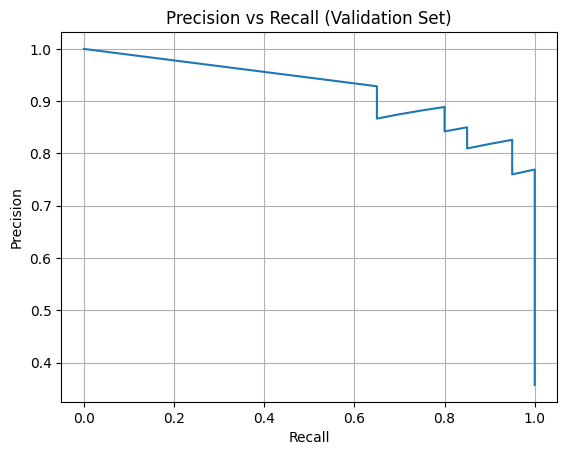

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


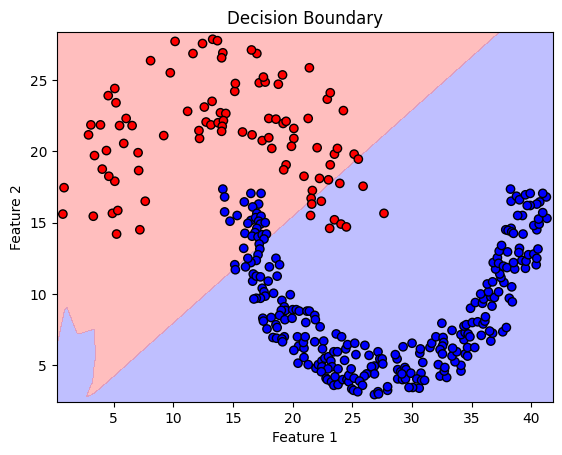

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

ds = np.loadtxt("datasets/lab10.txt")
X = ds[:, :2]
Y = np.where(ds[:, 2] == 2, 1, 0)

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=30, validation_data=(X_val, Y_val), verbose=1)

print("\nTraining accuracy and loss:")
model.evaluate(X_train, Y_train, verbose=1)
print("\nValidation accuracy and loss:")
model.evaluate(X_val, Y_val, verbose=1)
print("\nTesting accuracy and loss:")
model.evaluate(X_test, Y_test, verbose=1)

def report(X, Y, name):
    y_prob = model.predict(X)
    y_pred = (y_prob > 0.5).astype(int)
    cm = confusion_matrix(Y, y_pred)
    p = precision_score(Y, y_pred)
    r = recall_score(Y, y_pred)
    f1 = f1_score(Y, y_pred)
    print(f"\n{name} Set:")
    print("Confusion Matrix:\n", cm)
    print(f"Precision: {p:.3f}, Recall: {r:.3f}, F1 Score: {f1:.3f}")
    return y_prob

y_val_prob = report(X_val, Y_val, "Validation")

precisions, recalls, _ = precision_recall_curve(Y_val, y_val_prob)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall (Validation Set)")
plt.grid(True)
plt.show()

x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = model.predict(grid).reshape(xx.shape)



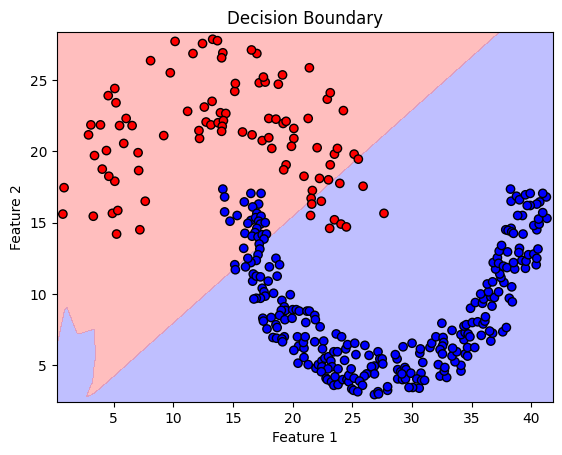

In [6]:
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.5, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolor='k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
report(X_test, Y_test, 'test')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

test Set:
Confusion Matrix:
 [[39  3]
 [ 0 14]]
Precision: 0.824, Recall: 1.000, F1 Score: 0.903


array([[0.53487635],
       [0.53487635],
       [0.01473948],
       [0.00236439],
       [0.53487635],
       [0.53487635],
       [0.02977248],
       [0.53487635],
       [0.02400555],
       [0.01499754],
       [0.01396115],
       [0.53136694],
       [0.00138652],
       [0.20678252],
       [0.0018429 ],
       [0.00732288],
       [0.01444736],
       [0.5324755 ],
       [0.00137419],
       [0.53487635],
       [0.53234345],
       [0.02023333],
       [0.00588083],
       [0.19177325],
       [0.03301187],
       [0.00647922],
       [0.53487635],
       [0.01749345],
       [0.00448889],
       [0.53487635],
       [0.01697736],
       [0.00514348],
       [0.01936629],
       [0.02046795],
       [0.05650972],
       [0.02099262],
       [0.00332695],
       [0.5311718 ],
       [0.0882776 ],
       [0.13281703],
       [0.15909003],
       [0.00103543],
       [0.00524225],
       [0.53487635],
       [0.00290035],
       [0.0032612 ],
       [0.53487635],
       [0.005